In [86]:
#Sklearn

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.utils import resample,shuffle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.metrics import make_scorer, precision_score, recall_score,f1_score, accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import make_scorer,precision_score,recall_score,accuracy_score,f1_score

#NLTK
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from IPython.display import display, HTML
#Other
import pandas as pd
import re
import string
import matplotlib.pyplot as pypl
import numpy as np
import seaborn as sd
#import imblearn
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

In [87]:
contract = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [88]:

stopword = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def penntag(pen):
    morphy_tag = {'NN': 'n', 'JJ': 'a',
                  'VB': 'v', 'RB': 'r'}
    try:
        return morphy_tag[pen[:2]]
    except:
        return 'n'


def comment_cleaner(comm, comment_array):
    temp_comm = []
    megos = ' '
    uncontracted = ' '.join([contract[word] if word in contract else word for word in comm.lower().split()])
    stopwords_removed = [word for word in uncontracted.lower().split() if word not in stopword]
    POS_words = nltk.pos_tag(stopwords_removed)
    for i in range(0, len(POS_words)):
        lemmas = lemma.lemmatize(POS_words[i][0], pos=penntag(POS_words[i][1]))
        temp_comm.append(lemmas)
    # print(temp_comm)
    megos = ' '.join(word for word in temp_comm)
    #comment_array.append(megos)
    return megos
   # comment_array.clear()

for ep in range(1, 2):

    # kaguya_file = 'D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Kaguya-sama cleaned\Kaguya-sama Episode ' +str(1)+' .csv'

   # df1 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode ' + str(1) + ' .csv',index_col=0, encoding='utf-8-sig')
   # df2 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode ' + str(2) + ' .csv',index_col=0, encoding='utf-8-sig')
   # df3 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode ' + str(3) + ' .csv',index_col=0, encoding='utf-8-sig')
    df1 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Kaguya-sama cleaned\Kaguya-sama Episode 1 .csv',index_col=0, encoding='utf-8-sig')
    df2 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Kaguya-sama cleaned\Kaguya-sama Episode 2 .csv',index_col=0, encoding='utf-8-sig')
    df3 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Kaguya-sama cleaned\Kaguya-sama Episode 3 .csv',index_col=0, encoding='utf-8-sig')
    #df4 = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Kaguya-sama cleaned\Kaguya-sama Episode 4 .csv',index_col=0, encoding='utf-8-sig')
    
    df12 = pd.concat([df1,df2,df3
                     ])
    train_array = []
    test_array = []
    train_target = []
    comtest_array = []
    # df = df.sample(frac=1)
    # Convert dataframe values into string
    df12 = df12[['Comments','Actual Polarity']]
    df12['Comments'] = df12['Comments'].astype(str)
    df12['Length'] = df12['Comments'].apply(len)
    df12 = df12[df12['Length'] > 5]
    
    df12['Comments'] = df12['Comments'].apply(lambda s: comment_cleaner(s, train_array))

    # Remove punctuation marks and tokenize each and every word
    df12['Comments'] = df12['Comments'].str.replace('[^\w\s]', ' ')
    df12['Comments'] = df12['Comments'].str.replace('[\d+]', ' ')
    df12['Comments'] = df12['Comments'].str.replace('(^| ).(( ).)*( |$)', ' ')

    
    # Split into positive and negative datasets
    pos_df = df12[df12['Actual Polarity'] == 1]
    neg_df = df12[df12['Actual Polarity'] == 0]
    df_len = len(pos_df)
  
    train_df = pd.concat([pos_df, neg_df])
    train_df = train_df.reset_index(drop=True)
   
    train_df['Comments'], train_df['Actual Polarity'] = shuffle(train_df['Comments'], train_df['Actual Polarity'])
    train_array = []
    test_array = []
    train_target = []
    comtest_array = []
    y = train_df['Actual Polarity']

    x_train, x_test, y_train, y_test = train_test_split(train_df['Comments'], train_df['Actual Polarity'], test_size=0.2,random_state=22)

Train Accuracy of  K Nearest Neighbours  :  0.7832317073170731
Test Accuracy of  K Nearest Neighbours  :  0.7078891257995735

Classification report of  K Nearest Neighbours  : 

             precision    recall  f1-score   support

          0       0.26      0.69      0.37        59
          1       0.94      0.71      0.81       410

avg / total       0.86      0.71      0.75       469



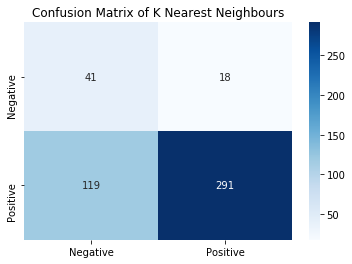





Train Accuracy of  Linear SVM  :  0.9954268292682927
Test Accuracy of  Linear SVM  :  0.8763326226012793

Classification report of  Linear SVM  : 

             precision    recall  f1-score   support

          0       0.53      0.17      0.26        59
          1       0.89      0.98      0.93       410

avg / total       0.85      0.88      0.85       469



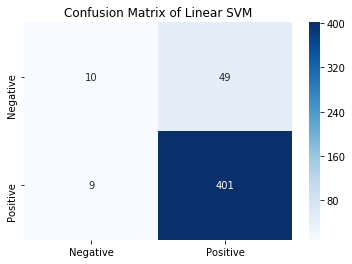





Train Accuracy of  Radial Basis Function SVM  :  0.9975609756097561
Test Accuracy of  Radial Basis Function SVM  :  0.8720682302771855

Classification report of  Radial Basis Function SVM  : 

             precision    recall  f1-score   support

          0       0.40      0.03      0.06        59
          1       0.88      0.99      0.93       410

avg / total       0.82      0.87      0.82       469



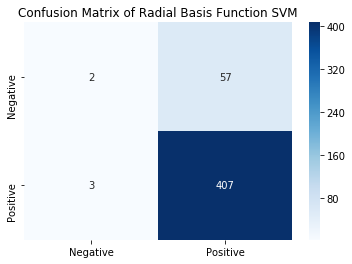





Train Accuracy of  Multinomial Naive Bayes  :  0.9875
Test Accuracy of  Multinomial Naive Bayes  :  0.8166311300639659

Classification report of  Multinomial Naive Bayes  : 

             precision    recall  f1-score   support

          0       0.36      0.61      0.46        59
          1       0.94      0.85      0.89       410

avg / total       0.87      0.82      0.84       469



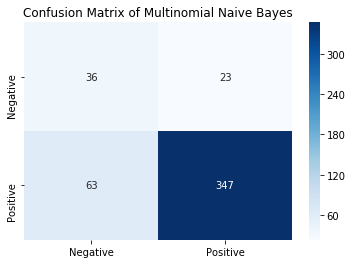

In [89]:
    vec = TfidfVectorizer(ngram_range=(1, 2),max_features=20000,sublinear_tf=True)
    x_tr = vec.fit_transform(x_train)
    x_ts = vec.transform(x_test)

    sm = RandomOverSampler(random_state=77)

    X_train_res, y_train_res = sm.fit_sample(x_tr, y_train)
    NB = MultinomialNB()
   # LSVM = svm.SVC(kernel='linear')
   # RSVM = svm.SVC(kernel='rbf')
    LSVM = svm.SVC(C=1.0,gamma=1e-05,kernel='linear')
    RSVM = svm.SVC(C=1.0,gamma = 10.0,kernel='rbf')
    modelKnn = KNeighborsClassifier(n_neighbors=87)

    classi = [modelKnn,LSVM,RSVM,NB]
    classifier_names = ['K Nearest Neighbours', 'Linear SVM','Radial Basis Function SVM', 'Multinomial Naive Bayes']

    acc_train = []
    acc_test = []
    cas_rep = []
    conu = []

    for classif in classi:
        pipi = Pipeline([('classifiers', classif)])
        pipi.fit(X_train_res, y_train_res)
        pri = pipi.predict(X_train_res)
        pred = pipi.predict(x_ts)
        acc_train.append(accuracy_score(y_train_res, pri))
        acc_test.append(accuracy_score(y_test, pred))
        # print(accuracy_score(y_test,pred))
        cas_rep.append(classification_report(y_test, pred))
        # print(classification_report(y_test, pred))

        conu.append(confusion_matrix(y_test, pred))
    # print(conf)

    for i in range(0, 4):
        #  print('Train Accuracy of ',classifier_names[i],' : ',acc_train[i])
        print('Train Accuracy of ', classifier_names[i], ' : ', acc_train[i])
        print('Test Accuracy of ', classifier_names[i], ' : ', acc_test[i])
        de = pd.DataFrame(conu[i], index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
        pypl.figure()
        title = 'Confusion Matrix of ' + classifier_names[i]
        print('\nClassification report of ', classifier_names[i], ' : \n')
        print(cas_rep[i])
        pypl.title(title)
        sd.heatmap(de, annot=True, cmap='Blues', fmt='g')
        pypl.show()
        print('\n\n\n')
        de.iloc[0:0]

Accuracy of  K Nearest Neighbours  :  0.5509259259259259

Classification report of  K Nearest Neighbours  : 

             precision    recall  f1-score   support

          0       0.13      0.79      0.23        72
          1       0.97      0.53      0.68       792

avg / total       0.90      0.55      0.65       864



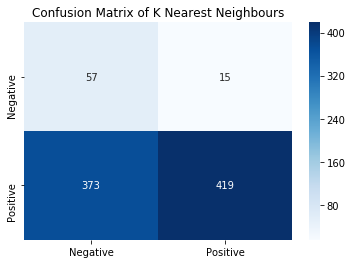





Accuracy of  Linear SVM  :  0.9120370370370371

Classification report of  Linear SVM  : 

             precision    recall  f1-score   support

          0       0.43      0.17      0.24        72
          1       0.93      0.98      0.95       792

avg / total       0.89      0.91      0.89       864



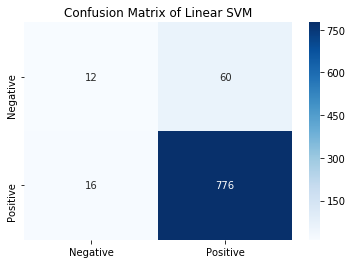





Accuracy of  Radial Basis Function SVM  :  0.8715277777777778

Classification report of  Radial Basis Function SVM  : 

             precision    recall  f1-score   support

          0       0.15      0.11      0.13        72
          1       0.92      0.94      0.93       792

avg / total       0.86      0.87      0.86       864



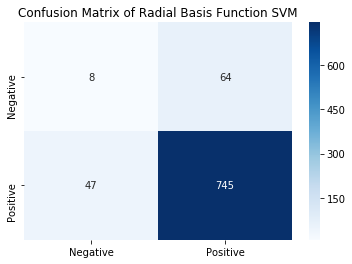





Accuracy of  Multinomial Naive Bayes  :  0.7291666666666666

Classification report of  Multinomial Naive Bayes  : 

             precision    recall  f1-score   support

          0       0.17      0.58      0.26        72
          1       0.95      0.74      0.83       792

avg / total       0.89      0.73      0.79       864



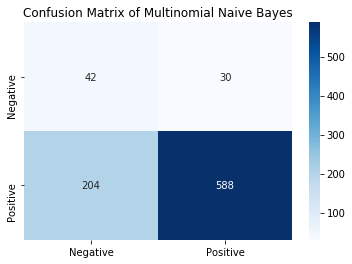

In [90]:
    
    
   # test_file = pd.read_csv(
   #     'D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode ' + str(
   #         4) + ' .csv', index_col=0, encoding='utf-8-sig')
    # test_file = test_file.sample(frac=1).reset_index(drop=True)
    # test_file = test_file[0:00]
    
    #test_file = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Tensei Slime cleaned\Tensei Slime Episode ' + str(4) + ' .csv',index_col=0, encoding='utf-8-sig') 
    test_file = pd.read_csv('D:\Github Projects\Heriot-Watt-Msc-Project-Sentiment-Analysis\Manually determines\Kaguya-sama cleaned\Kaguya-sama Episode 4 .csv',index_col=0, encoding='utf-8-sig')
    test_file['Comments'] = test_file['Comments'].astype(str)

    # Remove punctuation marks and tokenize each and every word
    test_file['Comments'] = test_file['Comments'].apply(lambda s: comment_cleaner(s, train_array))

    # Remove punctuation marks and tokenize each and every word
    test_file['Comments'] = test_file['Comments'].str.replace('[^\w\s]', ' ')
    test_file['Comments'] = test_file['Comments'].str.replace('[\d+]', ' ')
    test_file['Comments'] = test_file['Comments'].str.replace('(^| ).(( ).)*( |$)', ' ')

    pos_test_file = test_file[test_file['Actual Polarity'] == 1]
    neg_test_file = test_file[test_file['Actual Polarity'] == 0]
    neu_test_file = test_file[test_file['Actual Polarity'] == 2]

   # train_test = pd.concat([pos_test_file, neg_test_file,neu_test_file])
    train_test = pd.concat([pos_test_file, neg_test_file])
    train_test = train_test.reset_index(drop=True)
    train_test = train_test[['Comments','Actual Polarity']]
    te = train_test['Comments'].apply(lambda s : comment_cleaner(s, comtest_array))
    xe = vec.transform(te)
    # print(xe)
    
    ye = train_test['Actual Polarity']
    
   # classi = [modelKnn,SVM,NB]
    #steps = [('classifiers',classi)]
    acca_test = []
    clas_rep = []
    confu = []
    acc_train = []
  
    for classif in classi:
     pipi = Pipeline([('classifiers',classif)])
     pipi.fit(X_train_res, y_train_res)
     pred = pipi.predict(xe)
     arcs = (accuracy_score(ye,pred))
     acca_test.append(arcs)
     ue = classification_report(ye, pred)
     clas_rep.append(ue)
     conf = confusion_matrix(ye, pred)
     confu.append(conf)
     
    
    classifier_names = ['K Nearest Neighbours','Linear SVM','Radial Basis Function SVM','Multinomial Naive Bayes']
    
    for i in range(0,4):
      #  print('Train Accuracy of ',classifier_names[i],' : ',acc_train[i])
        print('Accuracy of ',classifier_names[i],' : ',acca_test[i])
       # de = pd.DataFrame(confu[i],index = ['Negative','Positive','Neutral'],columns = ['Negative','Positive','Neutral'])
        de = pd.DataFrame(confu[i],index = ['Negative','Positive'],columns = ['Negative','Positive'])
        pypl.figure()
        title = 'Confusion Matrix of ' + classifier_names[i] 
        print('\nClassification report of ',classifier_names[i],' : \n')
        print(clas_rep[i])
        pypl.title(title)
        sd.heatmap(de,annot=True,cmap='Blues', fmt='g')
        pypl.show()
        print('\n\n\n')
        de.iloc[0:0]
  